In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv(
    "C:\\Coding\\python-projects\\ml-jose-portilla\\jose\\08-Linear-Regression-Models\\Advertising.csv"
)

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
X = df.drop("sales",axis=1)
y = df["sales"]

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2,include_bias=False)

In [7]:
poly_features = poly.fit_transform(X)

In [8]:
poly_features.shape

(200, 9)

In [9]:
X.shape

(200, 3)

In [10]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [11]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   poly_features, y, test_size=0.3, random_state=101)

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [14]:
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)
y_pred

array([13.94856153, 19.33480262, 12.31928162, 16.76286337,  7.90210901,
        6.94143792, 20.13372693, 17.50092709, 10.56889   , 20.12551788,
        9.44614537, 14.09935417, 12.05513493, 23.39254049, 19.67508393,
        9.15626258, 12.1163732 ,  9.28149557,  8.44604007, 21.65588129,
        7.05070331, 19.35854208, 27.26716369, 24.58689346,  9.03179421,
       11.81070232, 20.42630125,  9.19390639, 12.74795186,  8.64340674,
        8.66294151, 20.20047377, 10.93673817,  6.84639129, 18.27939359,
        9.47659449, 10.34242145,  9.6657038 ,  7.43347915, 11.03561332,
       12.65731013, 10.65459946, 11.20971496,  7.46199023, 11.38224982,
       10.27331262,  6.15573251, 15.50893362, 13.36092889, 22.71839277,
       10.40389682, 13.21622701, 14.23622207, 11.8723677 , 11.68463616,
        5.62217738, 25.03778913,  9.53507734, 17.37926571, 15.7534364 ])

In [16]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_test, y_pred)

np.float64(0.6646431757269)

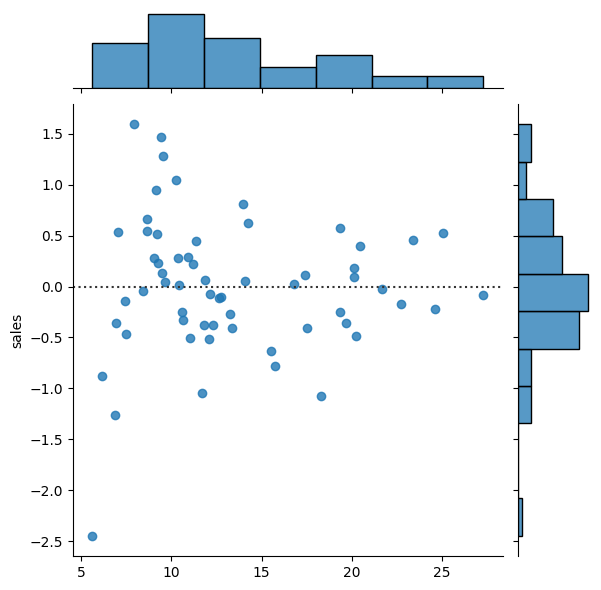

In [17]:
sns.jointplot(x=y_pred,y=y_test,kind="resid")

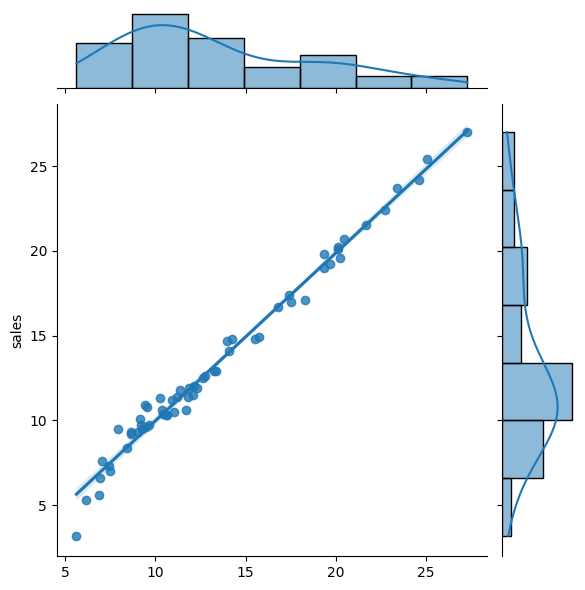

In [18]:
sns.jointplot(x=y_pred, y=y_test, kind="reg")

In [19]:
model.score(poly_features,y)

0.9861731356266271

Train RMSE ERRORS: 
 [np.float64(1.7346), np.float64(0.588), np.float64(0.4339), np.float64(0.3517), np.float64(0.2509), np.float64(0.1943), np.float64(5.4215), np.float64(0.1417), np.float64(0.1723)]
Test RMSE ERRORS: 
 [np.float64(1.5162), np.float64(0.6646), np.float64(0.5803), np.float64(0.5078), np.float64(2.5758), np.float64(4.3261), np.float64(1379.5707), np.float64(4506.56), np.float64(97547.2171)]


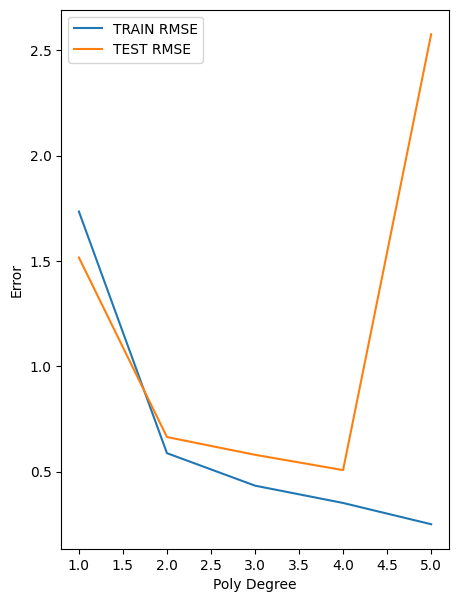

In [88]:
from sklearn.metrics import root_mean_squared_error
test_rmse_errors = []
train_rmse_errors = []

plt.figure(figsize=(5,7))


for i in range(1,10):
    poly = PolynomialFeatures(degree=i,include_bias=False)
    poly_features = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        poly_features, y,test_size= 0.3, random_state=101
    )
    model = LinearRegression()

    model.fit(X_train,y_train)

    y_pred_train = model.predict(X_train)
    train_rmse = root_mean_squared_error(y_train, y_pred_train)
    train_rmse_errors.append(np.round(train_rmse,4))

    y_pred_test = model.predict(X_test)
    test_rmse = root_mean_squared_error(y_test, y_pred_test)
    test_rmse_errors.append(np.round(test_rmse, 4))

print(f"Train RMSE ERRORS: \n {train_rmse_errors}")
print(f"Test RMSE ERRORS: \n {test_rmse_errors}")

plt.xlabel("Poly Degree")
plt.ylabel("Error")
plt.plot(range(1, 6), train_rmse_errors[:5], label="TRAIN RMSE")
plt.plot(range(1, 6), test_rmse_errors[:5], label="TEST RMSE")

plt.legend()

In [91]:
final_poly = PolynomialFeatures(degree=3,include_bias=False)
final_poly_transformed = final_poly.fit_transform(X)

In [92]:
final_model = LinearRegression()

final_model.fit(
    final_poly_transformed,y
)

LinearRegression()

In [94]:
from joblib import dump,load

dump(final_model,"final_poly_model.joblib")
dump(final_poly,"final_poly_converter.joblib")

['final_poly_converter.joblib']

In [97]:
loaded_poly_converter:PolynomialFeatures = load("final_poly_converter.joblib")

In [95]:
loaded_model: LinearRegression = load("final_poly_model.joblib")

In [99]:
poly_transformed = loaded_poly_converter.fit_transform([[149,22,12]])

loaded_model.predict(poly_transformed)

array([14.64501014])